In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pandas.api.types import is_numeric_dtype

In [ ]:
x = [1,2,3,4,5,6]
y = [6,9,12,15,18,21]

class basic_linear_regression:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.n = len(x)

        self.sum_x = sum(x)
        self.sum_y = sum(y)
        self.sum_xy = sum(a * b for a, b in zip(x, y))
        self.sum_x2 = sum(a ** 2 for a in x)

    def slope(self):
        self.m = (self.n * self.sum_xy - self.sum_x * self.sum_y) / (self.n * self.sum_x2 - self.sum_x ** 2)
        return self.m 

    def yint(self):
        int = (self.sum_y - self.m*self.sum_x) / self.n
        return int 

In [ ]:
test = basic_linear_regression(x,y)
m = test.slope()
b = test.yint()

y_pred = [m * xi + b for xi in x]

plt.scatter(x, y, color='blue', label='Actual Data')

plt.plot(x, y_pred, color='red', label='Predicted Line', linestyle='-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data = pd.read_csv("student_scores.zip")
def standardization(df):
    vals = pd.DataFrame()
    for val in df.columns[:-1]:
        μ = df[val].mean()
        σ = df[val].std()
        vals[val] = (df[val] - μ) / σ
            
    last_col = df.columns[-1]
    vals[last_col] = df[last_col]
    return vals

plotting = data.drop('Extracurricular Activities', axis=1)

In [ ]:
def manual_one_hot_encode(data):
    encoded = {}

    for column in data.columns:
        if is_numeric_dtype(data[column]):
            encoded[column] = data[column]
        else:
            unique_vals = sorted(set(data[column]))
            if len(unique_vals) == 2:
                main_val = unique_vals[0]
                encoded[column] = [1 if val == main_val else 0 for val in data[column]]
            else:
                for unique in unique_vals:
                    encoded[f'{column}_{unique}'] = [1 if val == unique else 0 for val in data[column]]

    df = pd.DataFrame(encoded)
    return df

In [4]:
def inTOfloat(df):
    return df.astype(float)

In [ ]:
for column in plotting.columns:
    plt.boxplot(plotting[column])
    plt.title(f'Plot of {column}')
    plt.xlabel('Index')
    plt.show()


In [ ]:
num_features = len(plotting.columns)
fig, axes = plt.subplots(num_features, num_features, figsize=(10, 10))

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        x = plotting.iloc[:, j]
        y = plotting.iloc[:, i]
        ax.scatter(x, y, alpha=0.7, s=10, color="blue")

        if j == 0:
            ax.set_ylabel(plotting.columns[i], fontsize=10)
        if i == num_features - 1:
            ax.set_xlabel(plotting.columns[j], fontsize=10)

        # Hide ticks for cleaner look
        ax.set_xticks([])
        ax.set_yticks([])

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
plotting = standardization(plotting)

In [ ]:
fig, ax = plt.subplots()

corr = plotting.corr()
im = ax.imshow(corr, cmap="magma")

labels = ['Hours Studied',"Previous Scores",
          'Sleep Hours','sample Questions','Performance Index']

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

ax.set_title("Scores Heatmap")

for i in range(len(labels)):
    for j in range(len(labels)):
        value = plotting.iloc[i, j]
        text = ax.text(j, i, f"{value:.2f}",
                       ha="center", va="center", color="w")

fig.tight_layout() 
plt.show()

In [5]:
df = standardization(inTOfloat(manual_one_hot_encode(data)))
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775149,1.704090,-1.010404,1.456132,-1.249691,91.0
1,-0.383461,0.723876,0.989604,-1.492220,-0.900937,65.0
2,1.161352,-1.063573,-1.010404,0.276791,-0.900937,45.0
3,0.002742,-1.005913,-1.010404,-0.902549,-0.900937,36.0
4,0.775149,0.320259,0.989604,0.866462,0.145326,66.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

class multi_linear_regression:
    def __init__(self,df):
        self.x = df.iloc[:, :-1]
        self.y = df.iloc[:, -1]
        self.X_train_df, self.X_test_df, self.y_train_df, self.y_test_df = train_test_split(self.x, self.y, test_size=0.2, random_state=42)

        intercept = np.ones((self.X_train_df.shape[0],1))
        self.X_train_df = np.hstack((intercept, self.X_train_df))

        intercept = np.ones((self.X_test_df.shape[0],1))
        self.X_test_df = np.hstack((intercept, self.X_test_df))

    def data_used(self): 
        return self.X_train_df, self.X_test_df, self.y_train_df, self.y_test_df

    def beta(self):   
        self.coefficients  = np.matmul(
            np.linalg.inv(np.matmul(self.X_train_df.T,self.X_train_df)),
            np.matmul(self.X_train_df.T,self.y_train_df)
            )
        return self.coefficients 
         
    def predict(self):
        return np.matmul(self.X_test_df, self.coefficients)

    def se_beta(self,prediction):
        cdiag = np.diag(np.linalg.inv(np.matmul(self.x.T,self.x)))
        residual = np.subtract(self.y_test_df, prediction)
        resSum = np.sum(np.square(residual))
        se = (resSum / (self.X_test_df.shape[0] - self.X_test_df.shape[1])) 
        return se * cdiag
        
    def evaluate(self, predictions):
        r2 = r2_score(self.y_test_df, predictions)
        mse = mean_squared_error(self.y_test_df, predictions)
        print(f"R² Score: {r2:.4f}")
        print(f"MSE: {mse:.4f}")
        return r2, mse

data = standardization(inTOfloat(manual_one_hot_encode(data)))

test1 = multi_linear_regression(data)
print(f"Coefficients: {test1.beta()}")
print(test1.se_beta(test1.predict()))
test1.evaluate(test1.predict())


Coefficients: [55.2407568   7.38596173 17.63778117 -0.3043071   0.8088274   0.55004746]
[0.00040973 0.00040967 0.00040986 0.00040978 0.00040976]
R² Score: 0.9890
MSE: 4.0826


(0.9889832909573145, 4.0826283985218605)

In [18]:
x_train_plot, x_test_plot, y_train_plot, y_test_plot = test1.data_used()

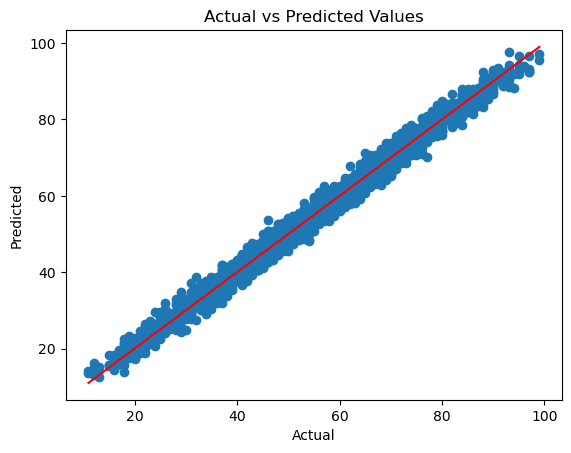

In [19]:
plt.scatter(y_test_plot, test1.predict())
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.plot([y_test_plot.min(), y_test_plot.max()], [y_test_plot.min(), y_test_plot.max()], color='red')

In [7]:
from sklearn.linear_model import LinearRegression

x = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

sigma_squared_hat = np.sum(residuals**2) / (len(X_test) - 2)
X_design = np.hstack((np.ones((len(X_test), 1)), X_test))
covariance_matrix = sigma_squared_hat * np.linalg.inv(X_design.T @ X_design)
standard_errors = np.sqrt(np.diag(covariance_matrix))

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Standard Errors (Intercept, Coefficient): {standard_errors}")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

Coefficients: [ 7.38596173 17.63778117 -0.3043071   0.8088274   0.55004746]
Intercept: 55.240756800755946
Standard Errors (Intercept, Coefficient): [0.04527997 0.0456453  0.04527306 0.04536806 0.04557824 0.04502154]
R² Score: 0.9889832909573145
MSE: 4.08262839852185
